In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv("multiple_linear_regression_dataset.csv")
print(df)

    age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700


In [5]:
X =df[["age","experience"]].values
Y= df["income"].values

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"Data train: {X_train}")
print(f"Data test:  {x_test}")

Data train: [[47  9]
 [32  5]
 [44  9]
 [58 17]
 [51  4]
 [47  2]
 [39  8]
 [37 10]
 [43 10]
 [54  5]
 [33  4]
 [29  1]
 [44 12]
 [28  5]]
Data test:  [[25  1]
 [23  1]
 [41  6]
 [30  3]
 [37  5]
 [51  7]]


In [4]:
w = np.random.randn(2)
b = np.random.randn()
alpha = 0.0001
print(w)
print(b)


[-0.10863351  0.0294981 ]
-1.641692432598499


In [5]:
def cost(w, b, x, y):
    m = len(x)
    y_guess = np.dot(x, w) + b 
    _cost = np.sum((y_guess - y) ** 2) 
    return _cost / (2 * m)

print(cost(w, b, X_train, Y_train))

947476882.0805848


In [6]:
def derivatives(w, b, x, y):
    m = len(x)

    der_w = np.dot(x.T,(np.dot(x,w) + b - y))
    der_b = np.sum((np.dot(x,w) + b - y))
    
    return der_w/m, der_b/m

print(derivatives(w,b,X_train,Y_train))

(array([-1815286.87781555,  -343455.22818457]), np.float64(-42644.547401445794))


In [7]:
def Gradient_descent( w,b, alpha, x, y, epoch = 100000):
    count = 1
    while True:
        der_w, der_b = derivatives(w, b, x, y)
        w = w - alpha * der_w
        b = b - alpha * der_b
        _cost = cost(w, b, x, y)
        print(f'Iteration # {count}, cost = {_cost}')

        if _cost < 1000000 or count == epoch:
            print(f'Breaking the loop. Cost = {_cost}, step = {count}\n\nw = {w}\nb = {b}')
            return w, b
        count+=1

In [12]:
w_final , b_final = Gradient_descent(w,b,alpha,X_train,Y_train)

Iteration # 1, cost = 638223679.5838057
Iteration # 2, cost = 434756699.5309299
Iteration # 3, cost = 300882934.8756877
Iteration # 4, cost = 212792235.24459532
Iteration # 5, cost = 154820711.15277606
Iteration # 6, cost = 116663621.51061848
Iteration # 7, cost = 91541826.96361472
Iteration # 8, cost = 74995561.8111388
Iteration # 9, cost = 64090897.514825955
Iteration # 10, cost = 56897701.98891081
Iteration # 11, cost = 52146206.74563106
Iteration # 12, cost = 49001074.0830274
Iteration # 13, cost = 46912763.56038279
Iteration # 14, cost = 45519751.04994733
Iteration # 15, cost = 44584201.97166809
Iteration # 16, cost = 43949652.89882801
Iteration # 17, cost = 43513171.723510146
Iteration # 18, cost = 43207042.77488525
Iteration # 19, cost = 42986718.080498025
Iteration # 20, cost = 42822890.910236895
Iteration # 21, cost = 42696281.23008986
Iteration # 22, cost = 42594205.229253545
Iteration # 23, cost = 42508318.52851469
Iteration # 24, cost = 42433131.513683245
Iteration # 25, co

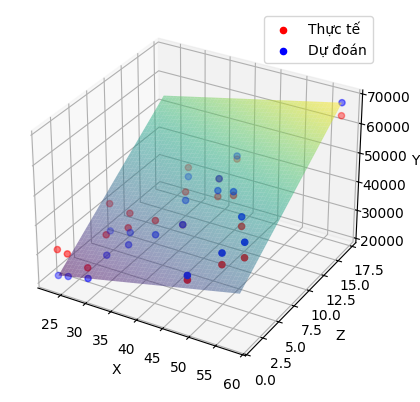

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = X[:, 0]
z_vals = X[:, 1]

# Tính giá trị dự đoán từ mô hình
y_vals = np.dot(X, w_final) + b_final

ax.scatter(x_vals, z_vals, Y, color='r', label='Thực tế')  # Dữ liệu thực tế
ax.scatter(x_vals, z_vals, y_vals, color='b', label='Dự đoán')  # Dữ liệu dự đoán

# Tạo lưới các giá trị x và z
x_grid, z_grid = np.meshgrid(np.linspace(min(x_vals), max(x_vals), 100), 
                             np.linspace(min(z_vals), max(z_vals), 100))

# Chuyển đổi lưới x, z thành dạng phù hợp với mô hình
X_grid = np.column_stack((x_grid.ravel(), z_grid.ravel()))
y_grid = np.dot(X_grid, w_final) + b_final
y_grid = y_grid.reshape(x_grid.shape)

ax.plot_surface(x_grid, z_grid, y_grid, cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

ax.legend()
plt.show()

**SKLEarn**

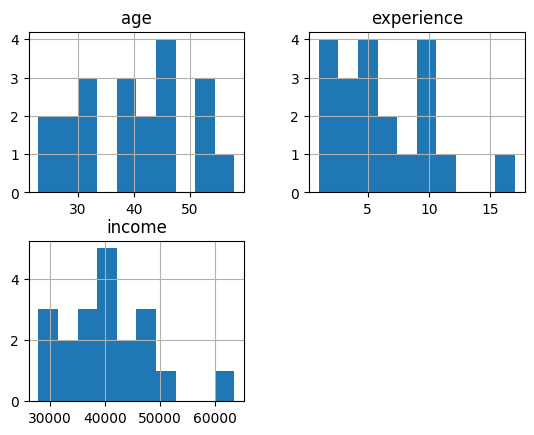

In [4]:
df.hist()
plt.show()

In [10]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
## Hiển thị kết quả các tham số:
print('Intercept w_0 =', model.intercept_)
print('          w_i =', model.coef_)

Intercept w_0 = 31112.751755503195
          w_i = [ -98.34696502 2168.24551409]
